# v5 sample generation
### Run UMAP on raw vs. decoded BRCA
From v4, test on unwrapped BLCA pretrain
Fine tune on BRCA per 2Dconv data run
Locate the data into the wrap function

In [1]:
import pandas as pd

In [2]:
import glob as glob

In [ ]:
# From:
/Users/karlberb/work/sample_count/smpl_gen/architechture/med_abs_dev/

In [ ]:
ls ../gexp_files

In [3]:
ls /Users/karlberb/work/sample_count/smpl_gen/architechture/gexp_files

ls: /Users/karlberb/work/sample_count/smpl_gen/architechture/gexp_files: No such file or directory


In [9]:
file_set = sorted(glob.glob('/Users/karlberb/work/sample_count/smpl_gen/gexp_files/*'))

In [ ]:
# From 
/Users/karlberb/work/sample_count/smpl_gen/architechture

In [10]:
file_set

['/Users/karlberb/work/sample_count/smpl_gen/gexp_files/ACC_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/BLCA_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/BRCA_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/CESC_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/COADREAD_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/ESCC_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/GEA_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/HNSC_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/KIRCKICH_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/KIRP_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/LGGGBM_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/LIHCCHOL_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/LUAD_gxp.tsv',
 '/Users/karlberb/work/sample_count/smpl_gen/gexp_files/LUSC_gxp.

In [ ]:
# Go to:
nb_A_data_structure____00.ipynb in image_gen
# per:
/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/image_gen/a_data_structure/a_data_structure_00.ipynb

In [6]:
lbld_fl_no_brca.shape # train on this, fine-tune on BRCA then
                        # make a UMAP of the raw and decoded BRCA samples

(7014, 5001)

In [7]:
# Manual train-test split, model only uses train and val, not test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_data, val_data = train_test_split(lbld_fl_no_brca)

In [8]:
train_data.shape

(5260, 5001)

In [45]:
5260/7014

0.7499287140005703

In [9]:
train_lbls = train_data.Labels

In [10]:
train_data.drop(columns = 'Labels', inplace = True)

In [11]:
val_data.shape

(1754, 5001)

In [12]:
val_lbls = val_data.Labels

In [13]:
val_data.drop(columns = 'Labels', inplace = True)

In [53]:
# Read BRCA, send to One Drive - done
brca = pd.read_csv('data/brca.tsv', sep = '\t',
                          index_col = 0) # to One Drive

# Send directly to 'to_umap' frame stacker for umap calculator input - done

In [15]:
# Train-test split on BRCA
brca_train_data, brca_val_data = train_test_split(brca)

In [22]:
brca_train_lbls = brca_train_data.Labels # Save for UMAP, remove for VAE

In [23]:
brca_train_data.drop(columns = 'Labels', inplace = True)

In [24]:
brca_val_lbls = brca_val_data.Labels

In [25]:
brca_val_data.drop(columns = 'Labels', inplace = True)

In [16]:
# Manual data split complete

In [17]:
# Begin scaling section
# why scale to -1,1 vs 0,1?
# test

In [ ]:
# Begin manual scaling for interactive control

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
train_data = MinMaxScaler().fit_transform(train_data)

In [20]:
val_data = MinMaxScaler().fit_transform(val_data)

In [26]:
brca_train_data = MinMaxScaler().fit_transform(brca_train_data)

In [27]:
brca_val_data = MinMaxScaler().fit_transform(brca_val_data)

In [ ]:
# End scaling of pre-training (cohorts n = 24) and BRCA fine-tuning data sets

In [23]:
# Summary of steps to making a summary UMAP:
    # BRCA removed from pretraining set, 24 cohorts remaining
        # intermediate files written
    # test set removed from code, not used by model
    # scaling done with default MinMaxScaler function
        # .fit_transform()
    
# Next actions:
    # Get model summary and plot_model to work in line
    # Get UMAP code queued up

In [28]:
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

2022-10-03 16:52:43.733058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# What is the next step to improve interactive control of loss and optimization?
# Probably remove class abtractions like how the MNIST VAE was solved

# Need to print model architechture in single plot with annotation

In [29]:
class Sampling(layers.Layer): # inheriting from Layer class
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs): # probably a tuple, what does the choice of 'call' mean?
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs): # **kwargs ?
        super(VAE, self).__init__(**kwargs)
        
        self.encoder: Model = encoder
        self.decoder: Model = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property # wrap methods as variable, for interactive, has getter (no setter)
                # add example as needed (syntantic sugar) further abstraction
                #
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape: # syntactic sugar, create a temporary instance to save memory (?)
                                        # dispose of when out scope
                                        # Replace with human interpretable version, try, properly closed
                                        # finally statement, deal with error
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss_fn = keras.losses.MeanSquaredError() # defining a variable to run one time on the next line
            reconstruction_loss = reconstruction_loss_fn(data, reconstruction)
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

In [30]:
latent_dim = 20 # Latent dims, smaller than last hidden layer

In [31]:
epochs = 15 # This is the number forward-pass / back-pass cycles
            # The loss function runs at the end of the forward pass to check the quality of the embedding
            # The optimizer runs during the back-pass to update the weights 

In [32]:
batch_size = 128 # how to determine the range of range of potential values?

# Answer: ______________

In [33]:
import tensorflow as tf

In [ ]:
# Template to control layer naming outside of kernel reset
Dense(units, activation, name="arbitrary name")

In [34]:
input_dimensions = train_data.shape[1] # Incorrect labeling, this is also the output dimension

# features count in first
encoder_inputs = keras.Input(shape=(input_dimensions,))

x = layers.Dense(units=500, activation="relu")(encoder_inputs)
x = layers.Dense(units=250, activation="relu")(x)
x = layers.Dense(units=50, activation="relu")(x)

# Trace the following two variables through the Sampling class methods as step one to remove class abstraction
latent_dim = 20
z_mean = layers.Dense(latent_dim, name="z_mean")(x) # The first discrepency from the previous layer calls is replacing units with an integer
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x) # so only actual difference is replacing activation function with a name
# is the 'units=' syntax required?

z = Sampling()([z_mean, z_log_var]) # Sampling thingy. Unannotated and impossible to inspect, test, and control here

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(units=50, activation="relu")(latent_inputs)
x = layers.Dense(units=250, activation="relu")(x)
x = layers.Dense(units=500, activation="relu")(x)

decoder_outputs = layers.Dense(units=input_dimensions, activation="relu")(x) # using input dimensions for symetry

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder") # build the decoder block
decoder.summary()

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam()) # Compile

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5000)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 500)          2500500     ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 250)          125250      ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 50)           12550       ['dense_1[0][0]']                
                                                                                            

2022-10-03 16:53:45.343526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 50)                1050      
                                                                 
 dense_4 (Dense)             (None, 250)               12750     
                                                                 
 dense_5 (Dense)             (None, 500)               125500    
                                                                 
 dense_6 (Dense)             (None, 5000)              2505000   
                                                                 
Total params: 2,644,300
Trainable params: 2,644,300
Non-trainable params: 0
_________________________________________________________________


In [36]:
v = 'v04_'

In [37]:
callbacks = []

early_stop = EarlyStopping(monitor="reconstruction_loss",
                           mode="min", patience=5,
                           restore_best_weights=True)
callbacks.append(early_stop)

csv_logger = CSVLogger(v+'training.log',
                       separator='\t')
callbacks.append(csv_logger)

In [38]:
epochs = 10

In [39]:
history = vae.fit(train_data,
                  callbacks=callbacks,
                  validation_data=(val_data, val_data),
                  epochs=epochs, batch_size=batch_size)

Epoch 1/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0801 - reconstruction_loss: 0.0079 - kl_loss: 0.0216 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/10
42/42 [==============================] - 1s 32ms/step - loss: 0.0063 - reconstruction_loss: 0.0062 - kl_loss: 3.5991e-05 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/10
42/42 [==============================] - 1s 31ms/step - loss: 0.0060 - reconstruction_loss: 0.0059 - kl_loss: 4.7748e-06 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/10
42/42 [==============================] - 1s 31ms/step - loss: 0.0058 - reconstruction_loss: 0.0059 - kl_loss: 7.6067e-07 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/10
42/42 [==============================] - 1s 31ms/step - loss: 0.0058 - reconstruction_loss: 0

In [40]:
import matplotlib.pyplot as plt

In [ ]:
# Get a loss plot, (from image gen)

In [41]:
history.history

{'loss': [0.02954516001045704,
  0.006197754759341478,
  0.005929304752498865,
  0.005869939923286438,
  0.005793610587716103,
  0.005814868025481701,
  0.005758325103670359,
  0.005771354306489229,
  0.005757052917033434,
  0.00577970826998353],
 'reconstruction_loss': [0.007929014973342419,
  0.0061617642641067505,
  0.005924529861658812,
  0.005869179032742977,
  0.0057935225777328014,
  0.005814868025481701,
  0.005758325103670359,
  0.005771354306489229,
  0.005757052917033434,
  0.00577970826998353],
 'kl_loss': [0.02161613665521145,
  3.599056071834639e-05,
  4.774757599079749e-06,
  7.606687972838699e-07,
  8.798780726237965e-08,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_total_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_reconstruction_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_kl_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

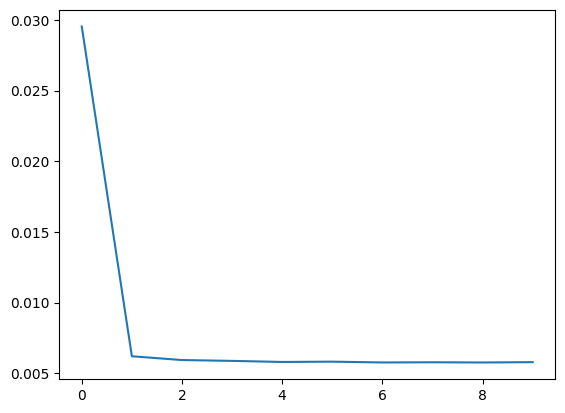

In [42]:
plt.plot(history.history['loss'],label="loss")

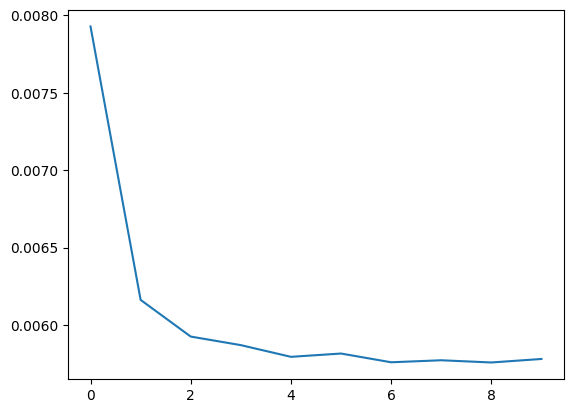

In [43]:
plt.plot(history.history['reconstruction_loss'],label="reconstruction_loss")

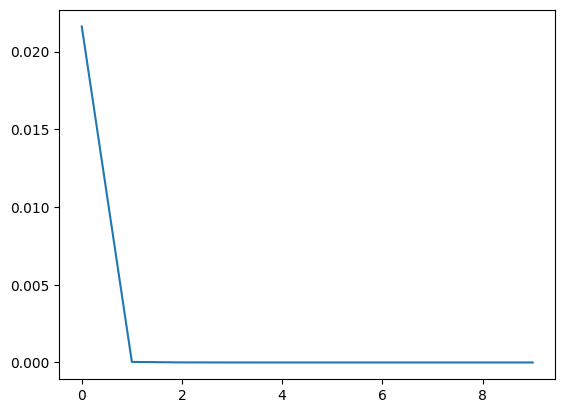

In [44]:
plt.plot(history.history['kl_loss'],label="kl_loss") # this is correct, per scientific notation

In [ ]:
# Location codes:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

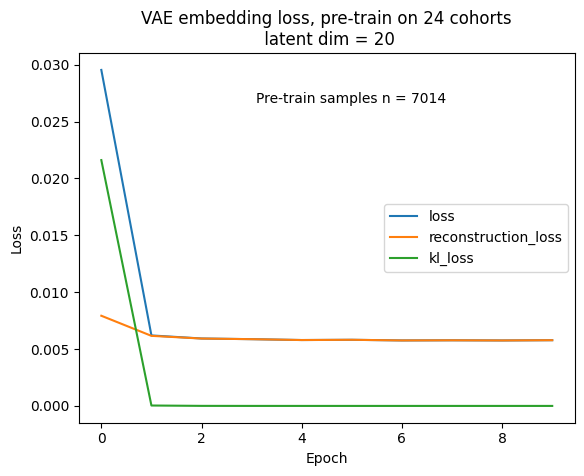

In [47]:
# Loss plot after training on everything other than BRCA and LGGGBM
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['reconstruction_loss'],label="reconstruction_loss")
plt.plot(history.history['kl_loss'],label="kl_loss")
plt.title('VAE embedding loss, pre-train on 24 cohorts\n'+
          # '+cohort+'
          # file.index.name+', burn-in, n = 495'+
          
          ' latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('Pre-train samples n = 7014',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )
plt.legend(loc=7)
plt.savefig('loss_plots/'+v+'pre-train_24_cohorts_loc7.png') # running manually, CHECK

In [ ]:
# Steps to finish pilot analysis:
    # Fine tune on BRCA - done, below
    # manually encode and decode the 995 BRCA samples
    # Make UMAP of the raw input and decoded samples - steps below

In [48]:
# Fine tune on BRCA
h2 = vae.fit(brca_train_data,
                  callbacks=callbacks,
                  validation_data=(brca_val_data, brca_val_data),
                  epochs=epochs, batch_size=batch_size)

Epoch 1/10
6/6 [==============================] - 0s 53ms/step - loss: 0.0200 - reconstruction_loss: 0.0184 - kl_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 39ms/step - loss: 0.0146 - reconstruction_loss: 0.0149 - kl_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 0s 40ms/step - loss: 0.0152 - reconstruction_loss: 0.0148 - kl_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 0s 40ms/step - loss: 0.0141 - reconstruction_loss: 0.0142 - kl_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_kl_loss: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 0s 35ms/step - loss: 0.0141 - reconstruction_loss: 0.0142 

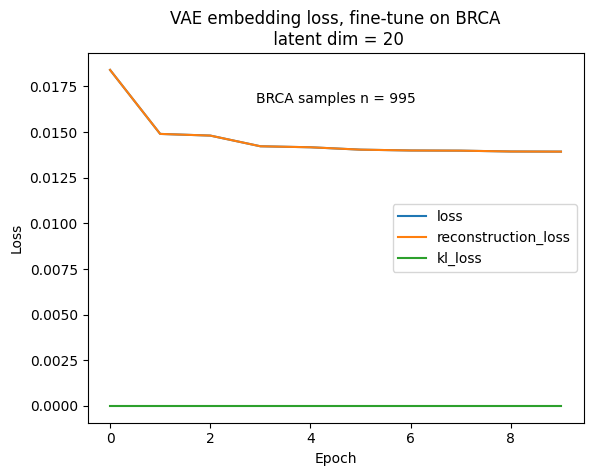

In [49]:
# Loss plot after training on everything other than BRCA and LGGGBM
plt.plot(h2.history['loss'],label="loss")
plt.plot(h2.history['reconstruction_loss'],label="reconstruction_loss")
plt.plot(h2.history['kl_loss'],label="kl_loss")
plt.title('VAE embedding loss, fine-tune on BRCA\n'+
          # '+cohort+'
          # file.index.name+', burn-in, n = 495'+
          
          ' latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('BRCA samples n = 995',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )
plt.legend(loc=7)
plt.savefig('loss_plots/'+v+'BRCA_fine-tune_post24_loc7.png') # running manually, CHECK

In [ ]:
# BRCA manual encode / decode 

### Template
z_mean, z_var, embedding = vae.encoder.predict(test_data)   
embedding = pd.DataFrame(embedding)   
embedding.to_csv(Path(base_path, f"{prefix}_embeddings.csv"), index=False)   

In [54]:
brca_drp = brca.drop(columns = 'Labels')

In [55]:
brca_drp

,N:GEXP::COL1A1:1277:,N:GEXP::ALB:213:,N:GEXP::FN1:2335:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,N:GEXP::KRT5:3852:,N:GEXP::FTL:2512:,N:GEXP::EEF1A1:1915:,N:GEXP::B2M:567:,N:GEXP::COL3A1:1281:,...,N:GEXP::SMURF1:57154:,N:GEXP::GNPNAT1:64841:,N:GEXP::DMXL1:1657:,N:GEXP::AKT3:10000:,N:GEXP::ProSAPiP1:9762:,N:GEXP::RANBP3:8498:,N:GEXP::SIDT2:51092:,N:GEXP::AS3MT:57412:,N:GEXP::ALOX5:240:,N:GEXP::PHF2:5253:
TCGA-3C-AAAU,55574.0,10.3400,46117.0,28980.0,41867.0,1.3786,26338.0,30241.0,18597.0,31599.0,...,1325.60,1210.80,1335.90,205.07,139.59,1466.5,2639.90,287.720,151.31,1258.70
TCGA-3C-AALI,179260.0,15.7690,106740.0,80417.0,107060.0,394.7800,32803.0,32370.0,39619.0,71843.0,...,915.01,1643.80,452.42,220.77,199.56,1637.8,701.63,18.613,361.61,1279.50
TCGA-3C-AALJ,180820.0,2.7199,120650.0,59057.0,110080.0,2.7199,54612.0,57191.0,34674.0,69689.0,...,1057.80,658.21,991.84,266.55,274.70,1312.8,1282.40,81.596,327.29,1986.40
TCGA-3C-AALK,434560.0,10.7570,136340.0,46370.0,98776.0,3429.5000,27160.0,101170.0,25775.0,196170.0,...,782.70,949.52,724.45,503.52,242.86,1381.9,940.38,117.500,783.20,1563.10
TCGA-4H-AAAK,413980.0,14.8940,244770.0,45376.0,94601.0,2734.5000,31521.0,89656.0,30344.0,239840.0,...,1027.10,1390.60,811.91,1274.50,271.92,2505.5,750.99,518.300,537.45,1663.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,269120.0,76.5630,77720.0,42184.0,225720.0,853.5900,54738.0,95227.0,21210.0,68828.0,...,607.38,1214.40,744.45,237.02,1273.90,1402.6,1026.80,295.660,887.80,1484.80
TCGA-XX-A899,204590.0,3.9370,102280.0,38674.0,96219.0,1374.4000,29322.0,98069.0,40918.0,132100.0,...,1081.00,970.08,1382.70,735.83,112.99,1327.2,1186.40,225.590,770.08,1445.70
TCGA-XX-A89A,450640.0,865.3800,175980.0,27911.0,110810.0,1282.0000,65213.0,100230.0,44892.0,261010.0,...,1256.80,1342.00,971.19,538.50,246.10,1157.8,1621.00,104.400,846.48,1779.40
TCGA-Z7-A8R5,72114.0,803.9900,14174.0,53184.0,131580.0,15913.0000,141260.0,150240.0,34322.0,43464.0,...,599.79,606.28,388.26,302.24,191.14,1432.4,1545.30,188.160,733.51,842.22


In [56]:
z_mean, z_var, embedding = vae.encoder.predict(brca_drp)

32/32 [==============================] - 0s 3ms/step


In [57]:
full_brca_out = vae.decoder.predict(embedding)

32/32 [==============================] - 0s 3ms/step


In [64]:
full_brca_out

array([[0.        , 0.        , 0.        , ..., 0.        , 0.16931024,
        0.41226438],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1671986 ,
        0.42846534],
       [0.        , 0.        , 0.        , ..., 0.        , 0.17164516,
        0.4225305 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.1721614 ,
        0.4271861 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1678282 ,
        0.42104048],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1691454 ,
        0.42378148]], dtype=float32)

In [65]:
full_brca_out.shape

(995, 5000)

In [ ]:
# UMAP construction steps:
# Single dataframe of expression values
# 1990 rows, each sample twice
    # 995 raw
    # 995 decoded - get now
# working from nb_D_UMAP_fnctn_plot_01

In [59]:
!pip install umap

  Running setup.py install for umap ... done
You are using pip version 18.1, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
# Imports relevant to following development blocks:
from sklearn.preprocessing import StandardScaler
import umap

ModuleNotFoundError: No module named 'umap'

In [61]:
!pip3 install umap

  Using cached umap-0.1.1.tar.gz (3.2 kB)
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=2e771198e021e5b35ae2e95afe36c8121ef712f2971fd72254a259e3831bba6e
  Stored in directory: /Users/karlberb/Library/Caches/pip/wheels/72/1e/42/a9322736ec046a637487005e6b84c94617d9ac0bdb5159eeb7
Successfully built umap


In [62]:
# Imports relevant to following development blocks:
from sklearn.preprocessing import StandardScaler
import umap

ModuleNotFoundError: No module named 'umap'

#### Run in terminal corresponding to this venv
(dense_full_env_00) bash-3.2$ !pip3 install umap

In [63]:
# Imports relevant to following development blocks:
from sklearn.preprocessing import StandardScaler
import umap

In [ ]:
# worked with without restart of kernel, good
# This is an instance of python running in an ipykernel running in a venv
# Instance is apparently incapable of modding itself without restart

In [ ]:
# Need to pass TCGA sample index thruogh model ignored as to not rely on sample order to restructure data for UMAP

In [68]:
brca_dec = pd.DataFrame(full_brca_out)

In [69]:
brca_dec

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.157278,0.270813,0.0,0.126494,0.152092,0.213385,0.0,...,0.225119,0.142440,0.272949,0.062367,0.082750,0.368878,0.261109,0.0,0.169310,0.412264
1,0.0,0.0,0.0,0.160438,0.281582,0.0,0.125278,0.158682,0.211073,0.0,...,0.227379,0.144799,0.282750,0.060768,0.083886,0.375550,0.277794,0.0,0.167199,0.428465
2,0.0,0.0,0.0,0.152870,0.262697,0.0,0.116263,0.152652,0.208540,0.0,...,0.219936,0.137316,0.271760,0.061775,0.082768,0.361237,0.258688,0.0,0.171645,0.422531
3,0.0,0.0,0.0,0.155981,0.268526,0.0,0.122871,0.154511,0.202982,0.0,...,0.228689,0.143918,0.278210,0.061911,0.082364,0.365595,0.265857,0.0,0.171132,0.422610
4,0.0,0.0,0.0,0.153190,0.269140,0.0,0.119489,0.161247,0.206087,0.0,...,0.223679,0.141456,0.275762,0.071188,0.083706,0.370366,0.264184,0.0,0.175512,0.428140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.152522,0.270517,0.0,0.123558,0.160484,0.205133,0.0,...,0.215537,0.137777,0.271953,0.054242,0.074884,0.363111,0.263550,0.0,0.164448,0.418733
991,0.0,0.0,0.0,0.146969,0.259020,0.0,0.116070,0.147118,0.206528,0.0,...,0.225174,0.136412,0.256991,0.064895,0.074682,0.357690,0.253989,0.0,0.160597,0.412212
992,0.0,0.0,0.0,0.153496,0.272526,0.0,0.129869,0.159285,0.202588,0.0,...,0.229172,0.141797,0.275166,0.062611,0.079943,0.370247,0.269211,0.0,0.172161,0.427186
993,0.0,0.0,0.0,0.152479,0.273317,0.0,0.124900,0.155631,0.202213,0.0,...,0.221597,0.146406,0.272463,0.061705,0.078920,0.367898,0.261206,0.0,0.167828,0.421040


In [80]:
brca.Labels

TCGA-3C-AAAU    BRCA_1
TCGA-3C-AALI    BRCA_4
TCGA-3C-AALJ    BRCA_2
TCGA-3C-AALK    BRCA_1
TCGA-4H-AAAK    BRCA_1
                 ...  
TCGA-WT-AB44    BRCA_1
TCGA-XX-A899    BRCA_1
TCGA-XX-A89A    BRCA_1
TCGA-Z7-A8R5    BRCA_1
TCGA-Z7-A8R6    BRCA_2
Name: Labels, Length: 995, dtype: object

In [73]:
list(brca.index)

['TCGA-3C-AAAU',
 'TCGA-3C-AALI',
 'TCGA-3C-AALJ',
 'TCGA-3C-AALK',
 'TCGA-4H-AAAK',
 'TCGA-5L-AAT0',
 'TCGA-5T-A9QA',
 'TCGA-A1-A0SD',
 'TCGA-A1-A0SE',
 'TCGA-A1-A0SF',
 'TCGA-A1-A0SG',
 'TCGA-A1-A0SH',
 'TCGA-A1-A0SI',
 'TCGA-A1-A0SJ',
 'TCGA-A1-A0SK',
 'TCGA-A1-A0SM',
 'TCGA-A1-A0SN',
 'TCGA-A1-A0SO',
 'TCGA-A1-A0SP',
 'TCGA-A1-A0SQ',
 'TCGA-A2-A04N',
 'TCGA-A2-A04P',
 'TCGA-A2-A04Q',
 'TCGA-A2-A04R',
 'TCGA-A2-A04T',
 'TCGA-A2-A04U',
 'TCGA-A2-A04V',
 'TCGA-A2-A04W',
 'TCGA-A2-A04X',
 'TCGA-A2-A04Y',
 'TCGA-A2-A0CK',
 'TCGA-A2-A0CM',
 'TCGA-A2-A0CO',
 'TCGA-A2-A0CP',
 'TCGA-A2-A0CQ',
 'TCGA-A2-A0CR',
 'TCGA-A2-A0CS',
 'TCGA-A2-A0CT',
 'TCGA-A2-A0CU',
 'TCGA-A2-A0CV',
 'TCGA-A2-A0CW',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0D1',
 'TCGA-A2-A0D2',
 'TCGA-A2-A0D3',
 'TCGA-A2-A0D4',
 'TCGA-A2-A0EM',
 'TCGA-A2-A0EN',
 'TCGA-A2-A0EO',
 'TCGA-A2-A0EP',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0ER',
 'TCGA-A2-A0ES',
 'TCGA-A2-A0ET',
 'TCGA-A2-A0EU',
 'TCGA-A2-A0EV',
 'TCGA-A2-A0EW',
 'TCGA-A2-A0EX',
 'TCGA-A2-A0EY

In [84]:
brca_dec.insert(0, 'Labels', list(brca.Labels))

In [83]:
brca_dec.drop(columns = 'Labels', inplace = True)

In [85]:
brca_dec # add 'decoded' to label string

,Labels,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,BRCA_1,0.0,0.0,0.0,0.157278,0.270813,0.0,0.126494,0.152092,0.213385,...,0.225119,0.142440,0.272949,0.062367,0.082750,0.368878,0.261109,0.0,0.169310,0.412264
1,BRCA_4,0.0,0.0,0.0,0.160438,0.281582,0.0,0.125278,0.158682,0.211073,...,0.227379,0.144799,0.282750,0.060768,0.083886,0.375550,0.277794,0.0,0.167199,0.428465
2,BRCA_2,0.0,0.0,0.0,0.152870,0.262697,0.0,0.116263,0.152652,0.208540,...,0.219936,0.137316,0.271760,0.061775,0.082768,0.361237,0.258688,0.0,0.171645,0.422531
3,BRCA_1,0.0,0.0,0.0,0.155981,0.268526,0.0,0.122871,0.154511,0.202982,...,0.228689,0.143918,0.278210,0.061911,0.082364,0.365595,0.265857,0.0,0.171132,0.422610
4,BRCA_1,0.0,0.0,0.0,0.153190,0.269140,0.0,0.119489,0.161247,0.206087,...,0.223679,0.141456,0.275762,0.071188,0.083706,0.370366,0.264184,0.0,0.175512,0.428140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,BRCA_1,0.0,0.0,0.0,0.152522,0.270517,0.0,0.123558,0.160484,0.205133,...,0.215537,0.137777,0.271953,0.054242,0.074884,0.363111,0.263550,0.0,0.164448,0.418733
991,BRCA_1,0.0,0.0,0.0,0.146969,0.259020,0.0,0.116070,0.147118,0.206528,...,0.225174,0.136412,0.256991,0.064895,0.074682,0.357690,0.253989,0.0,0.160597,0.412212
992,BRCA_1,0.0,0.0,0.0,0.153496,0.272526,0.0,0.129869,0.159285,0.202588,...,0.229172,0.141797,0.275166,0.062611,0.079943,0.370247,0.269211,0.0,0.172161,0.427186
993,BRCA_1,0.0,0.0,0.0,0.152479,0.273317,0.0,0.124900,0.155631,0.202213,...,0.221597,0.146406,0.272463,0.061705,0.078920,0.367898,0.261206,0.0,0.167828,0.421040


In [86]:
train_dec = brca_dec

In [87]:
new_labels = [] # for shapes and colors on plot
for i in train_dec.Labels:
    if i == 'BRCA_1':
        new_labels.append('BRCA_1_decoded')
    if i == 'BRCA_2':
        new_labels.append('BRCA_2_decoded')
    if i == 'BRCA_3':
        new_labels.append('BRCA_3_decoded')
    if i == 'BRCA_4':
        new_labels.append('BRCA_4_decoded')
train_dec.Labels = new_labels

In [96]:
orig.head(3) # order looks good, replace index with original

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::ALB:213:,N:GEXP::FN1:2335:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,N:GEXP::KRT5:3852:,N:GEXP::FTL:2512:,N:GEXP::EEF1A1:1915:,N:GEXP::B2M:567:,...,N:GEXP::SMURF1:57154:,N:GEXP::GNPNAT1:64841:,N:GEXP::DMXL1:1657:,N:GEXP::AKT3:10000:,N:GEXP::ProSAPiP1:9762:,N:GEXP::RANBP3:8498:,N:GEXP::SIDT2:51092:,N:GEXP::AS3MT:57412:,N:GEXP::ALOX5:240:,N:GEXP::PHF2:5253:
TCGA-3C-AAAU,BRCA_1,55574.0,10.3400,46117.0,28980.0,41867.0,1.3786,26338.0,30241.0,18597.0,...,1325.60,1210.80,1335.90,205.07,139.59,1466.5,2639.90,287.720,151.31,1258.7
TCGA-3C-AALI,BRCA_4,179260.0,15.7690,106740.0,80417.0,107060.0,394.7800,32803.0,32370.0,39619.0,...,915.01,1643.80,452.42,220.77,199.56,1637.8,701.63,18.613,361.61,1279.5
TCGA-3C-AALJ,BRCA_2,180820.0,2.7199,120650.0,59057.0,110080.0,2.7199,54612.0,57191.0,34674.0,...,1057.80,658.21,991.84,266.55,274.70,1312.8,1282.40,81.596,327.29,1986.4


In [95]:
train_dec

,Labels,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,BRCA_1_decoded,0.0,0.0,0.0,0.157278,0.270813,0.0,0.126494,0.152092,0.213385,...,0.225119,0.142440,0.272949,0.062367,0.082750,0.368878,0.261109,0.0,0.169310,0.412264
1,BRCA_4_decoded,0.0,0.0,0.0,0.160438,0.281582,0.0,0.125278,0.158682,0.211073,...,0.227379,0.144799,0.282750,0.060768,0.083886,0.375550,0.277794,0.0,0.167199,0.428465
2,BRCA_2_decoded,0.0,0.0,0.0,0.152870,0.262697,0.0,0.116263,0.152652,0.208540,...,0.219936,0.137316,0.271760,0.061775,0.082768,0.361237,0.258688,0.0,0.171645,0.422531
3,BRCA_1_decoded,0.0,0.0,0.0,0.155981,0.268526,0.0,0.122871,0.154511,0.202982,...,0.228689,0.143918,0.278210,0.061911,0.082364,0.365595,0.265857,0.0,0.171132,0.422610
4,BRCA_1_decoded,0.0,0.0,0.0,0.153190,0.269140,0.0,0.119489,0.161247,0.206087,...,0.223679,0.141456,0.275762,0.071188,0.083706,0.370366,0.264184,0.0,0.175512,0.428140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,BRCA_1_decoded,0.0,0.0,0.0,0.152522,0.270517,0.0,0.123558,0.160484,0.205133,...,0.215537,0.137777,0.271953,0.054242,0.074884,0.363111,0.263550,0.0,0.164448,0.418733
991,BRCA_1_decoded,0.0,0.0,0.0,0.146969,0.259020,0.0,0.116070,0.147118,0.206528,...,0.225174,0.136412,0.256991,0.064895,0.074682,0.357690,0.253989,0.0,0.160597,0.412212
992,BRCA_1_decoded,0.0,0.0,0.0,0.153496,0.272526,0.0,0.129869,0.159285,0.202588,...,0.229172,0.141797,0.275166,0.062611,0.079943,0.370247,0.269211,0.0,0.172161,0.427186
993,BRCA_1_decoded,0.0,0.0,0.0,0.152479,0.273317,0.0,0.124900,0.155631,0.202213,...,0.221597,0.146406,0.272463,0.061705,0.078920,0.367898,0.261206,0.0,0.167828,0.421040


In [97]:
orig.index

Index(['TCGA-3C-AAAU', 'TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK',
       'TCGA-4H-AAAK', 'TCGA-5L-AAT0', 'TCGA-5T-A9QA', 'TCGA-A1-A0SD',
       'TCGA-A1-A0SE', 'TCGA-A1-A0SF',
       ...
       'TCGA-UL-AAZ6', 'TCGA-UU-A93S', 'TCGA-V7-A7HQ', 'TCGA-W8-A86G',
       'TCGA-WT-AB41', 'TCGA-WT-AB44', 'TCGA-XX-A899', 'TCGA-XX-A89A',
       'TCGA-Z7-A8R5', 'TCGA-Z7-A8R6'],
      dtype='object', length=995)

In [99]:
train_dec.set_index(orig.index, drop = True, inplace = True)

In [88]:
# Now stack this up with the raw values and run through the UMAP function
orig = brca

In [ ]:
# Data type conversion template
orig.iloc[:,1:] = orig.iloc[:,1:].astype('uint8') # conversion to uint8

In [100]:
# Create a stacked orig and decoded frame to send to umap calculator
to_umap = pd.concat(
    [orig, train_dec])

In [101]:
to_umap.shape # hard fail

(1990, 10001)

In [ ]:
# Would also like to pass column headers through model ignored

In [102]:
orig.columns

Index(['Labels', 'N:GEXP::COL1A1:1277:', 'N:GEXP::ALB:213:',
       'N:GEXP::FN1:2335:', 'N:GEXP::GAPDH:2597:', 'N:GEXP::ACTB:60:',
       'N:GEXP::KRT5:3852:', 'N:GEXP::FTL:2512:', 'N:GEXP::EEF1A1:1915:',
       'N:GEXP::B2M:567:',
       ...
       'N:GEXP::SMURF1:57154:', 'N:GEXP::GNPNAT1:64841:',
       'N:GEXP::DMXL1:1657:', 'N:GEXP::AKT3:10000:', 'N:GEXP::ProSAPiP1:9762:',
       'N:GEXP::RANBP3:8498:', 'N:GEXP::SIDT2:51092:', 'N:GEXP::AS3MT:57412:',
       'N:GEXP::ALOX5:240:', 'N:GEXP::PHF2:5253:'],
      dtype='object', length=5001)

In [104]:
train_dec.columns = orig.columns

In [105]:
to_umap = pd.concat(
    [orig, train_dec])

In [106]:
to_umap # ftw

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::ALB:213:,N:GEXP::FN1:2335:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,N:GEXP::KRT5:3852:,N:GEXP::FTL:2512:,N:GEXP::EEF1A1:1915:,N:GEXP::B2M:567:,...,N:GEXP::SMURF1:57154:,N:GEXP::GNPNAT1:64841:,N:GEXP::DMXL1:1657:,N:GEXP::AKT3:10000:,N:GEXP::ProSAPiP1:9762:,N:GEXP::RANBP3:8498:,N:GEXP::SIDT2:51092:,N:GEXP::AS3MT:57412:,N:GEXP::ALOX5:240:,N:GEXP::PHF2:5253:
TCGA-3C-AAAU,BRCA_1,55574.0,10.3400,46117.0,28980.000000,41867.000000,1.3786,26338.000000,30241.000000,18597.000000,...,1325.600000,1210.800000,1335.900000,205.070000,139.590000,1466.500000,2639.900000,287.720,151.310000,1258.700000
TCGA-3C-AALI,BRCA_4,179260.0,15.7690,106740.0,80417.000000,107060.000000,394.7800,32803.000000,32370.000000,39619.000000,...,915.010000,1643.800000,452.420000,220.770000,199.560000,1637.800000,701.630000,18.613,361.610000,1279.500000
TCGA-3C-AALJ,BRCA_2,180820.0,2.7199,120650.0,59057.000000,110080.000000,2.7199,54612.000000,57191.000000,34674.000000,...,1057.800000,658.210000,991.840000,266.550000,274.700000,1312.800000,1282.400000,81.596,327.290000,1986.400000
TCGA-3C-AALK,BRCA_1,434560.0,10.7570,136340.0,46370.000000,98776.000000,3429.5000,27160.000000,101170.000000,25775.000000,...,782.700000,949.520000,724.450000,503.520000,242.860000,1381.900000,940.380000,117.500,783.200000,1563.100000
TCGA-4H-AAAK,BRCA_1,413980.0,14.8940,244770.0,45376.000000,94601.000000,2734.5000,31521.000000,89656.000000,30344.000000,...,1027.100000,1390.600000,811.910000,1274.500000,271.920000,2505.500000,750.990000,518.300,537.450000,1663.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1_decoded,0.0,0.0000,0.0,0.152522,0.270517,0.0000,0.123558,0.160484,0.205133,...,0.215537,0.137777,0.271953,0.054242,0.074884,0.363111,0.263550,0.000,0.164448,0.418733
TCGA-XX-A899,BRCA_1_decoded,0.0,0.0000,0.0,0.146969,0.259020,0.0000,0.116070,0.147118,0.206528,...,0.225174,0.136412,0.256991,0.064895,0.074682,0.357690,0.253989,0.000,0.160597,0.412212
TCGA-XX-A89A,BRCA_1_decoded,0.0,0.0000,0.0,0.153496,0.272526,0.0000,0.129869,0.159285,0.202588,...,0.229172,0.141797,0.275166,0.062611,0.079943,0.370247,0.269211,0.000,0.172161,0.427186
TCGA-Z7-A8R5,BRCA_1_decoded,0.0,0.0000,0.0,0.152479,0.273317,0.0000,0.124900,0.155631,0.202213,...,0.221597,0.146406,0.272463,0.061705,0.078920,0.367898,0.261206,0.000,0.167828,0.421040


In [112]:
to_umap.isnull().values.any()

True

In [113]:
to_umap.isnull().sum().sum()

10000

In [115]:
to_umap.fillna(0, inplace = True)

In [116]:
n_comps = 2 # about 10 seconds wall for 2k samples
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(to_umap.iloc[:,1:]) # colmn index here
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(to_umap.Labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [91]:
%whos

Variable           Type             Data/Info
---------------------------------------------
CSVLogger          type             <class 'keras.callbacks.CSVLogger'>
EarlyStopping      type             <class 'keras.callbacks.EarlyStopping'>
MinMaxScaler       type             <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
Model              type             <class 'keras.engine.training.Model'>
Sampling           type             <class '__main__.Sampling'>
StandardScaler     type             <class 'sklearn.preproces<...>ng._data.StandardScaler'>
VAE                type             <class '__main__.VAE'>
batch_size         int              128
brca               DataFrame                      Labels  N:G<...>[995 rows x 5001 columns]
brca_dec           DataFrame                     Labels    0 <...>[995 rows x 5001 columns]
brca_drp           DataFrame                      N:GEXP::COL<...>[995 rows x 5000 columns]
brca_train_data    ndarray          746x5000: 3730000 elems, ty

https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi

(dense_full_env_00) bash-3.2$ pip uninstall umap

(dense_full_env_00) bash-3.2$ pip install umap-learn

In [92]:
import umap.umap_ as umap

/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/dense_layer/dense_full_env_00/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(to_umap.iloc[:,1:]) # colmn index here
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(to_umap.Labels))

/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/dense_layer/dense_full_env_00/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/dense_layer/dense_full_env_00/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Input contains NaN.

In [94]:
to_umap

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::ALB:213:,N:GEXP::FN1:2335:,N:GEXP::GAPDH:2597:,N:GEXP::ACTB:60:,N:GEXP::KRT5:3852:,N:GEXP::FTL:2512:,N:GEXP::EEF1A1:1915:,N:GEXP::B2M:567:,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
TCGA-3C-AAAU,BRCA_1,55574.0,10.3400,46117.0,28980.0,41867.0,1.3786,26338.0,30241.0,18597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3C-AALI,BRCA_4,179260.0,15.7690,106740.0,80417.0,107060.0,394.7800,32803.0,32370.0,39619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3C-AALJ,BRCA_2,180820.0,2.7199,120650.0,59057.0,110080.0,2.7199,54612.0,57191.0,34674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3C-AALK,BRCA_1,434560.0,10.7570,136340.0,46370.0,98776.0,3429.5000,27160.0,101170.0,25775.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-4H-AAAK,BRCA_1,413980.0,14.8940,244770.0,45376.0,94601.0,2734.5000,31521.0,89656.0,30344.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,BRCA_1_decoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.215537,0.137777,0.271953,0.054242,0.074884,0.363111,0.263550,0.0,0.164448,0.418733
991,BRCA_1_decoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.225174,0.136412,0.256991,0.064895,0.074682,0.357690,0.253989,0.0,0.160597,0.412212
992,BRCA_1_decoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229172,0.141797,0.275166,0.062611,0.079943,0.370247,0.269211,0.0,0.172161,0.427186
993,BRCA_1_decoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.221597,0.146406,0.272463,0.061705,0.078920,0.367898,0.261206,0.0,0.167828,0.421040


In [117]:
date = '2022_10_04'

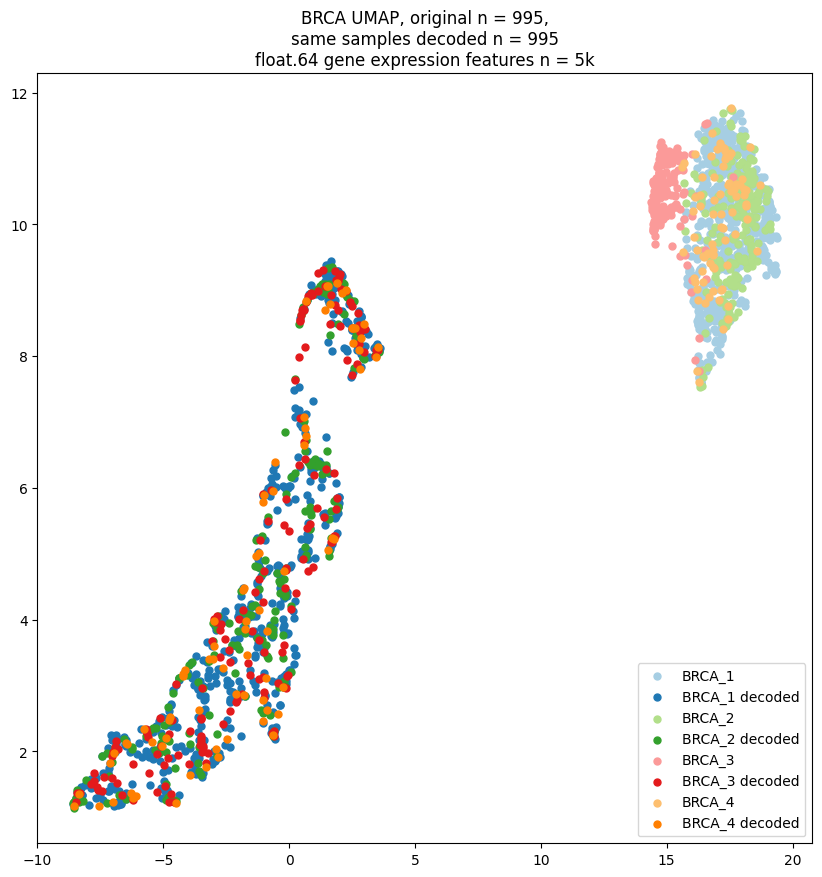

In [119]:
# Template to mod for orig enc / dec plot; x and y inserted by mapping function
dot_size = 25

fig = plt.figure(figsize = (10, 10))

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1'].x, embdDF[embdDF.Labels == 'BRCA_1'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='o', label = 'BRCA_1')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_decoded'].x, embdDF[embdDF.Labels == 'BRCA_1_decoded'].y,
            s=dot_size, color=plt.cm.Paired(1), marker='o', label = 'BRCA_1 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2'].x, embdDF[embdDF.Labels == 'BRCA_2'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='o', label = 'BRCA_2')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_decoded'].x, embdDF[embdDF.Labels == 'BRCA_2_decoded'].y,
            s=dot_size, color=plt.cm.Paired(3), marker='o', label = 'BRCA_2 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3'].x, embdDF[embdDF.Labels == 'BRCA_3'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='o', label = 'BRCA_3')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_decoded'].x, embdDF[embdDF.Labels == 'BRCA_3_decoded'].y,
            s=dot_size, color=plt.cm.Paired(5), marker='o', label = 'BRCA_3 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4'].x, embdDF[embdDF.Labels == 'BRCA_4'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='o', label = 'BRCA_4')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_decoded'].x, embdDF[embdDF.Labels == 'BRCA_4_decoded'].y,
            s=dot_size, color=plt.cm.Paired(7), marker='o', label = 'BRCA_4 decoded')

plt.title('BRCA UMAP, original n = 995,\nsame samples decoded n = 995'+
    '\n'+
    'float.64 gene expression features n = 5k')
          
plt.legend(loc = 'lower right')
plt.savefig('umap_plots/'+
            'BRCA_org_&_enc-dec_'+v+'_'+date+'.png')

In [ ]:
# Project managment
# share new OneDrive dir with the 7014 sample pre-train file
# and BRCA file

# Put tf_2.10 kernel setup file to current version-controlled repo
# Put v4 ipynb to vers cont rep

# Push v4 ipynb file and kernel venv tf 2.10 file
# Post loss plot and code summary

In [ ]:
# Devel notes

In [ ]:
# Loss plot template from image gen:

In [ ]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('VAE embedding loss, '+cohort+' pre-train\n'+
          
          # file.index.name+', burn-in, n = 495'+
          
          ' latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('test_fraction = default',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
# plt.savefig('dir_n/cohort_n'+str(epochs)+'_epochs_2022-08-date_version.png')

In [ ]:
# Version three notes:
# want to plot entire model in a single plot

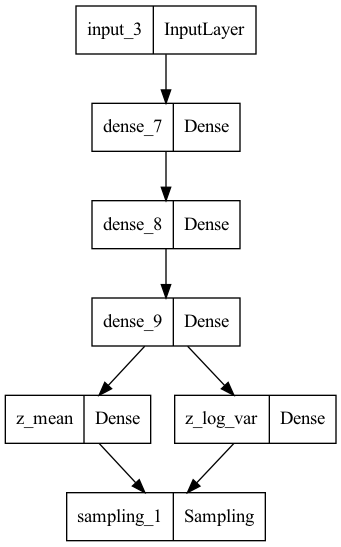

In [54]:
tf.keras.utils.plot_model(encoder)

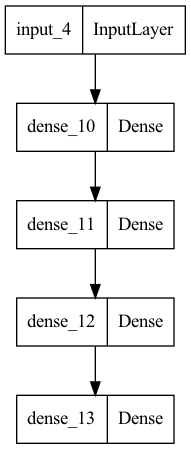

In [55]:
tf.keras.utils.plot_model(decoder)

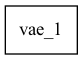

In [56]:
tf.keras.utils.plot_model(vae)

In [58]:
vae.summary()

Model: "vae_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Functional)        [(None, 20),              2640340   
                              (None, 20),                        
                              (None, 20)]                        
                                                                 
 decoder (Functional)        (None, 5000)              2644300   
                                                                 
Total params: 5,284,646
Trainable params: 5,284,640
Non-trainable params: 6
_________________________________________________________________


In [61]:
train_data.shape

(5260, 5000)

In [63]:
z_mean, z_var, embedding = vae.encoder.predict(train_data)

165/165 [==============================] - 1s 3ms/step


In [64]:
embedding

array([[ 0.3234752 , -1.2088282 , -0.868047  , ..., -2.1852577 ,
        -0.30128038,  1.8874421 ],
       [-1.5242392 ,  0.38799328,  2.021199  , ..., -0.34019104,
         1.1975409 ,  0.8213216 ],
       [-0.35598558, -0.45318714, -0.40438265, ...,  1.1076939 ,
        -1.6277497 , -1.5070637 ],
       ...,
       [ 2.4448314 ,  0.2034154 ,  0.5473086 , ...,  0.21020706,
         0.93059504, -0.8707014 ],
       [ 0.37825528, -0.4546344 , -0.8965705 , ..., -0.12769608,
        -0.4117424 , -2.087294  ],
       [ 0.44533563, -1.9265841 , -1.4104232 , ...,  1.2093595 ,
        -0.13143612,  0.17306556]], dtype=float32)

In [65]:
embedding.shape

(5260, 20)

In [66]:
embedding = pd.DataFrame(embedding)

In [67]:
embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.323475,-1.208828,-0.868047,-0.550095,-2.067183,0.436901,-1.502774,1.730421,-0.812574,-1.670540,0.297653,0.704742,-0.652438,-0.085701,-1.239026,0.673383,-1.162230,-2.185258,-0.301280,1.887442
1,-1.524239,0.387993,2.021199,1.039691,-0.010996,-0.445139,-1.080481,-3.623045,-0.145293,1.000198,0.367011,1.043173,-1.138608,-1.498647,1.944050,-0.561878,0.614160,-0.340191,1.197541,0.821322
2,-0.355986,-0.453187,-0.404383,-0.560966,-0.625604,-0.898787,0.382202,0.724301,-0.787633,1.087325,-0.714590,-0.260143,0.982424,-2.048256,1.750904,-2.397552,1.531412,1.107694,-1.627750,-1.507064
3,-0.931277,0.486365,-0.451062,-0.036231,-0.107167,0.922616,0.649348,0.901664,-3.783492,-0.423400,0.788734,1.542381,0.638316,-0.095085,-0.503129,-0.155582,-1.378624,-0.335394,-0.512897,0.810063
4,-0.623426,-0.261456,0.278186,-0.270424,-2.570462,1.438456,-1.615971,1.160794,0.276044,-1.591954,-0.671557,-0.311719,0.169505,0.023601,-0.616195,-0.239492,1.620908,1.229882,-0.243734,-1.180520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,-0.388274,0.317101,0.090944,-0.476509,-0.269841,-1.830022,1.324961,0.601067,0.563240,2.201684,0.330376,-0.942831,1.076092,0.601823,0.595537,-0.549175,1.653739,-0.203435,1.395871,0.372809
5256,0.508247,1.225837,0.464545,-0.233326,0.539308,0.130426,0.894729,-0.705720,1.444724,0.239856,1.200232,0.455760,0.715876,-0.018051,0.742176,-0.973939,-0.721431,1.949422,-0.471040,1.085507
5257,2.444831,0.203415,0.547309,0.237390,-1.096769,-1.078997,0.533180,-0.576573,0.536752,-2.018754,2.086290,1.797171,-0.789626,-1.353945,-1.374421,-0.665149,0.736623,0.210207,0.930595,-0.870701
5258,0.378255,-0.454634,-0.896571,-1.371232,-0.068591,0.222845,0.427691,1.676204,-0.682735,0.507534,1.457048,-1.330084,-2.300584,0.076906,-0.340079,-0.333527,-0.830837,-0.127696,-0.411742,-2.087294


In [71]:
type(embedding)

pandas.core.frame.DataFrame

In [69]:
decoded_train = decoder.predict(embedding)

165/165 [==============================] - 0s 3ms/step


In [70]:
decoded_train

array([[0.01722146, 0.        , 0.        , ..., 0.        , 0.05221446,
        0.18593678],
       [0.0173588 , 0.        , 0.        , ..., 0.        , 0.06111689,
        0.17573541],
       [0.01906952, 0.        , 0.        , ..., 0.        , 0.05965975,
        0.17520297],
       ...,
       [0.01734738, 0.        , 0.        , ..., 0.        , 0.05965343,
        0.18580315],
       [0.01660776, 0.        , 0.        , ..., 0.        , 0.05856263,
        0.18120074],
       [0.01465911, 0.        , 0.        , ..., 0.        , 0.06101042,
        0.1903685 ]], dtype=float32)

In [72]:
decoded_train = pd.DataFrame(decoded_train)

In [73]:
decoded_train

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.017221,0.0,0.0,0.079811,0.173412,0.030249,0.037833,0.102501,0.0,0.019907,...,0.078506,0.073635,0.043689,0.109713,0.084963,0.226050,0.144625,0.0,0.052214,0.185937
1,0.017359,0.0,0.0,0.075550,0.166710,0.033540,0.035977,0.102578,0.0,0.021529,...,0.070556,0.076626,0.040216,0.105984,0.078936,0.226371,0.138587,0.0,0.061117,0.175735
2,0.019070,0.0,0.0,0.073406,0.165771,0.030617,0.032858,0.101904,0.0,0.018775,...,0.071514,0.077354,0.040921,0.107321,0.078949,0.227198,0.137464,0.0,0.059660,0.175203
3,0.018372,0.0,0.0,0.076412,0.165444,0.028148,0.032621,0.111511,0.0,0.021302,...,0.082042,0.073883,0.045790,0.105175,0.085916,0.228242,0.151176,0.0,0.060460,0.186090
4,0.018051,0.0,0.0,0.079770,0.170857,0.034693,0.036152,0.098573,0.0,0.020293,...,0.073895,0.075317,0.042483,0.102705,0.078333,0.230642,0.137037,0.0,0.056980,0.182862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,0.017368,0.0,0.0,0.073620,0.170107,0.031732,0.034021,0.109226,0.0,0.021880,...,0.071498,0.076658,0.041765,0.100548,0.081350,0.221692,0.144252,0.0,0.061313,0.175850
5256,0.016605,0.0,0.0,0.076812,0.170908,0.029136,0.035662,0.106522,0.0,0.021056,...,0.073050,0.076091,0.042755,0.105335,0.082551,0.222979,0.138598,0.0,0.061364,0.180535
5257,0.017347,0.0,0.0,0.076953,0.174535,0.033163,0.035601,0.106158,0.0,0.021880,...,0.073850,0.074682,0.044727,0.104723,0.080065,0.232273,0.140202,0.0,0.059653,0.185803
5258,0.016608,0.0,0.0,0.076497,0.168146,0.029990,0.036443,0.101728,0.0,0.020082,...,0.077713,0.075972,0.046886,0.101806,0.084062,0.224168,0.144165,0.0,0.058563,0.181201


In [ ]:
z_mean, z_var, embedding = vae.encoder.predict(test_data)
embedding = pd.DataFrame(embedding)
embedding.to_csv(Path(base_path, f"{prefix}_embeddings.csv"), index=False)